In [1]:
begin
	import Pkg
    Pkg.activate()
	#Ojo, dado que activamos Pkg, ya no estamos en un entorno de notebooks reproducibles.
end

  Activating project at `~/.julia/environments/v1.11`


In [2]:
begin
	using DataFrames
	using Dates
	using CategoricalArrays
    using CSV
	using Statistics, Distributions;	
end

In [5]:
begin
    data = CSV.read("../dataset/bank-full.csv", DataFrame)
end

Row,age,job,marital,education,default,balance,housing,loan,contact,day,month,durations,campaign,pdays,previous,poutcome,y
,Int64,String15,String15,String15,String3,Int64,String3,String3,String15,Int64,String3,Int64,Int64,Int64,Int64,String7,String3
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
9,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no


In [9]:
describe(data)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,age,40.9363,18,39.0,95,0,Int64
2,job,,admin.,,unknown,0,String15
3,marital,,divorced,,single,0,String15
4,education,,primary,,unknown,0,String15
5,default,,no,,yes,0,String3
6,balance,1362.24,-8019,448.0,102127,0,Int64
7,housing,,no,,yes,0,String3
8,loan,,no,,yes,0,String3
9,contact,,cellular,,unknown,0,String15


In [11]:
for col in names(data)
    if eltype(data[!, col]) <: AbstractString
        println("Column: $col")
        println("Unique values: ", unique(data[!, col]))
        println("Number of unique values: ", length(unique(data[!, col])))
        println("-" ^ 50)
    end
end

Column: job
Unique values: String15["management", "technician", "entrepreneur", "blue-collar", "unknown", "retired", "admin.", "services", "self-employed", "unemployed", "housemaid", "student"]
Number of unique values: 12
--------------------------------------------------
Column: marital
Unique values: String15["married", "single", "divorced"]
Number of unique values: 3
--------------------------------------------------
Column: education
Unique values: String15["tertiary", "secondary", "unknown", "primary"]
Number of unique values: 4
--------------------------------------------------
Column: default
Unique values: String3["no", "yes"]
Number of unique values: 2
--------------------------------------------------
Column: housing
Unique values: String3["yes", "no"]
Number of unique values: 2
--------------------------------------------------
Column: loan
Unique values: String3["no", "yes"]
Number of unique values: 2
--------------------------------------------------
Column: contact
Unique

---

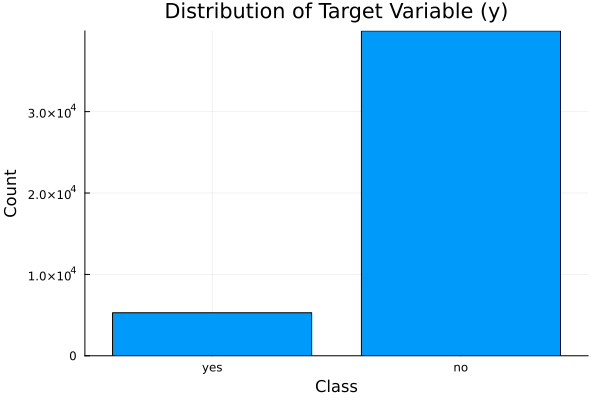

In [13]:
using Plots
using StatsBase

bar(collect(keys(countmap(data.y))), collect(values(countmap(data.y))), 
    title="Distribution of Target Variable (y)", 
    xlabel="Class", ylabel="Count",
    legend=false)

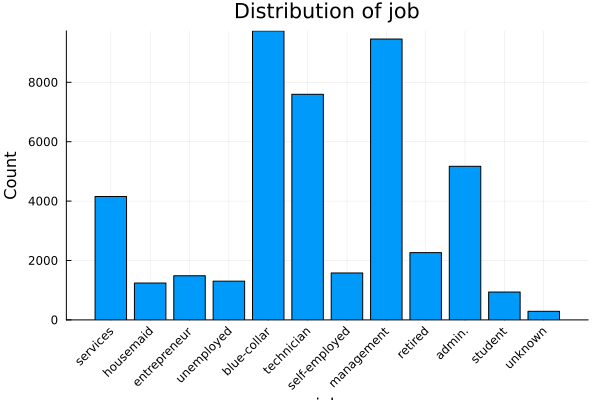

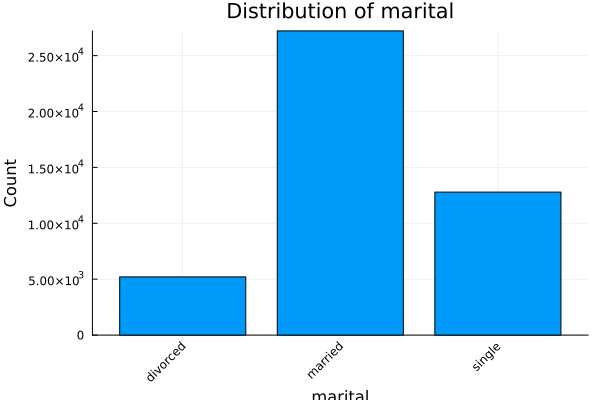

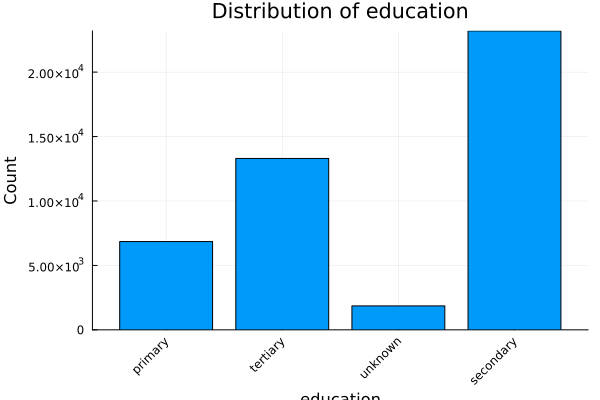

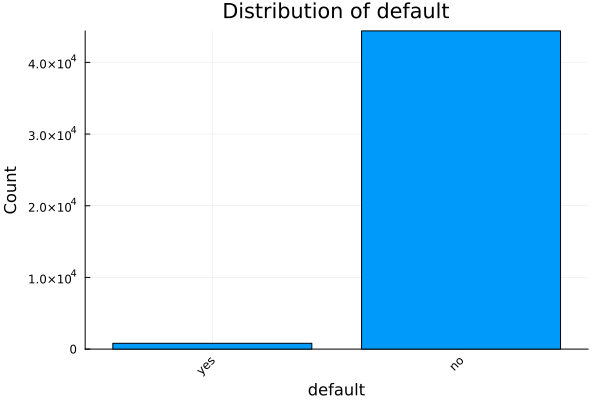

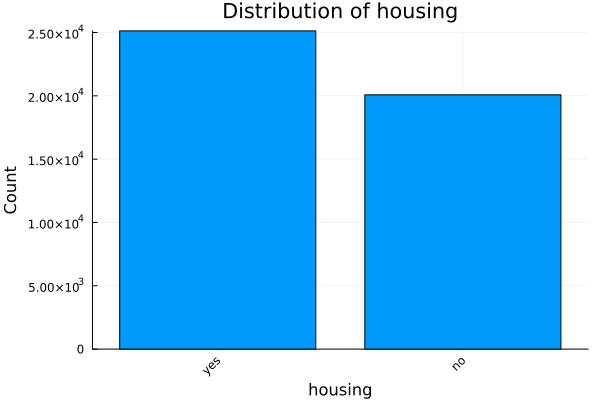

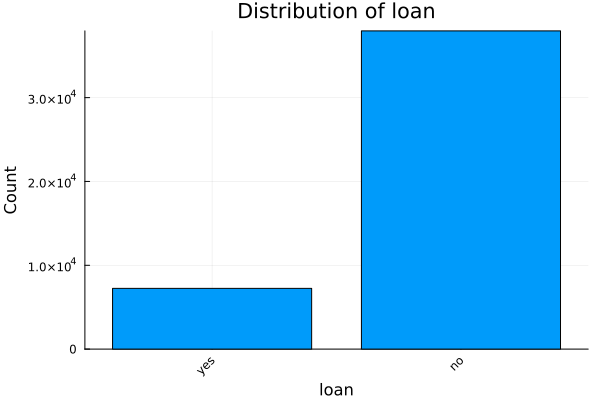

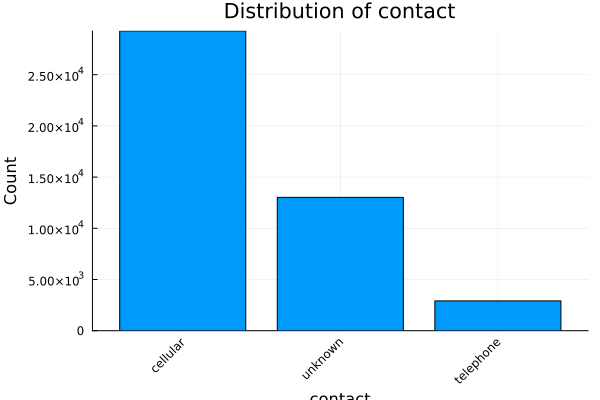

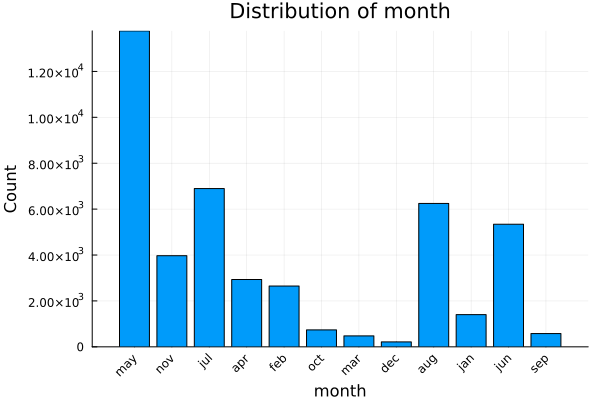

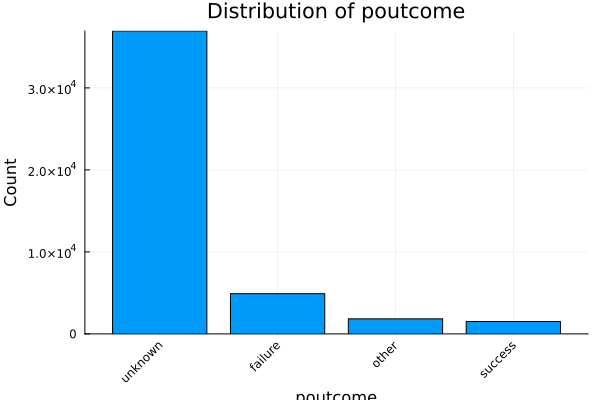

In [14]:
for col in names(data)
    if eltype(data[!, col]) <: AbstractString && col != "y"
        counts = countmap(data[!, col])
        bar(collect(keys(counts)), collect(values(counts)),
            title="Distribution of $col",
            xlabel=col, ylabel="Count",
            legend=false,
            xrotation=45)
        display(current())
    end
end